In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
start = '2007-1-1'
end = '2009-12-31'

In [3]:
infy = yf.Ticker('INFY.NS')
data = infy.history(start=start, end=end)

In [4]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2007-01-02,80.24,81.80,79.71,80.94,8629864,0.0,0
2007-01-03,80.94,82.62,80.94,82.32,10889256,0.0,0
2007-01-04,82.67,82.80,81.02,81.39,8777064,0.0,0
2007-01-05,81.41,82.09,80.33,81.02,7021952,0.0,0
2007-01-08,81.02,81.20,78.08,78.55,18481368,0.0,0
...,...,...,...,...,...,...,...
2009-12-16,126.59,129.12,125.61,128.55,9163072,0.0,0
2009-12-17,128.56,129.92,128.07,129.27,8603088,0.0,0
2009-12-18,129.52,129.52,126.74,127.60,11180776,0.0,0


In [5]:
low = pd.DataFrame(data=data['Low'], index=data.index)
high = pd.DataFrame(data=data['High'], index=data.index)

In [6]:
## finding the optimum k through silhouette method
def optimum_Kval_sil(data):
    kmax = 11
    sil = {}
    k_model = {}
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k).fit(data)
        k_model[k] = kmeans
        labels = kmeans.labels_
        sil[k]=(silhouette_score(data, labels))
    optimum_cluster = k_model[max(sil, key=sil.get)]
    return optimum_cluster

In [7]:
low_cl = optimum_Kval_sil(high)
high_cl = optimum_Kval_sil(low)

In [8]:
low_ce = low_cl.cluster_centers_
high_ce = high_cl.cluster_centers_

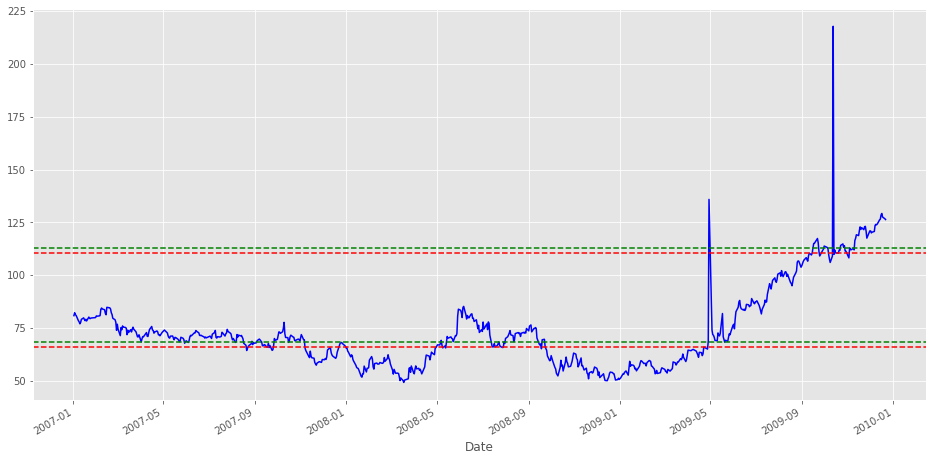

In [9]:
data['Close'].plot(figsize=(16,8), c='b')
for i in low_ce:
    plt.axhline(i, c='g', ls='--')
for i in high_ce:
    plt.axhline(i, c='r', ls='--')

In [10]:
## finding the optimum k through elbow method
def get_optimum_clusters(data, saturation_point=0.05):

    wcss = []
    k_models = []

    size = 11
    for i in range(1, size):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        k_models.append(kmeans)
        
    plt.plot(range(1,11), wcss)
            
    

    return k_models

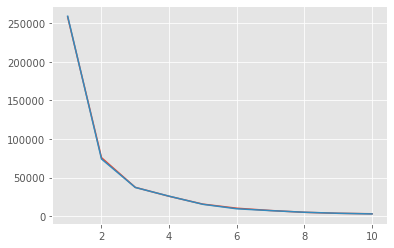

In [11]:
## indexing 2 as 3 is the k value (elbow point)
low_clusters = get_optimum_clusters(low)[2]
high_clusters = get_optimum_clusters(high)[2]

In [12]:
low_centers = low_clusters.cluster_centers_
high_centers = high_clusters.cluster_centers_

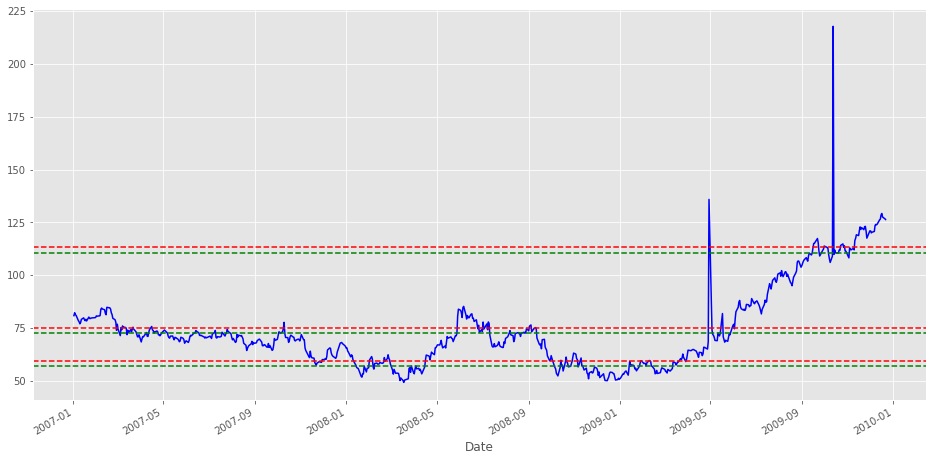

In [13]:
data['Close'].plot(figsize=(16,8), c='b')
for i in low_centers:
    plt.axhline(i, c='g', ls='--')
for i in high_centers:
    plt.axhline(i, c='r', ls='--')